# Convergence & Stability, Discretized Pressure Field, Nonlinear BVP
### Nov. 2019

# Problem 1
## 1a)

To show this numerical scheme is second-order accurate, we Taylor expand to rewrite the scheme. We can see there are 5 terms to Taylor expand: $U_j^n, U_j^{n+1}, U_j^{n-1}, U_{j+1}^n, U_{j-1}^n$

Given that $U_j^n = u(j\Delta x, n \Delta t)$, we Taylor expand around $x=j$ or $t=n$:

First, because it represents the point at the current time and location (so $\Delta t = \Delta x = 0$), we have:

\begin{equation}
U_j^n = u(j,n) = u 
\end{equation}

Around $t=n$ we have: 

\begin{equation}
U_j^{n+1} = u(j, n+1) = u + \Delta t u_t + \frac{\Delta t^2}{2}u_{tt} + \frac{\Delta t^3}{6}u_{ttt} + \frac{\Delta t^4}{24}u_{tttt} + h.o.t.
\end{equation}

\begin{equation}
U_j^{n-1} = u(j, n-1) = u - \Delta t u_t + \frac{\Delta t^2}{2}u_{tt} - \frac{\Delta t^3}{6}u_{ttt} + \frac{\Delta t^4}{24}u_{tttt} + h.o.t.
\end{equation}

Around $x=j$ we have:

\begin{equation}
U_{j+1}^n = u(j+1, n) = u + \Delta x u_x + \frac{\Delta x^2}{2}u_{xx} + \frac{\Delta x^3}{6}u_{xxx} + \frac{\Delta x^4}{24}u_{xxxx} + h.o.t.
\end{equation}

\begin{equation}
U_{j-1}^n = u(j-1, n) = u - \Delta x u_x + \frac{\Delta x^2}{2}u_{xx} - \frac{\Delta x^3}{6}u_{xxx} + \frac{\Delta x^4}{24}u_{xxxx} + h.o.t.
\end{equation}


Plugging in these approximations in the term to the left produces:

\begin{equation}
\frac{U_j^{n+1} - 2U_j^n + U_j^{n-1}}{\Delta t^2} = \frac{u + \Delta t u_t + \frac{\Delta t^2}{2}u_{tt} + \frac{\Delta t^3}{6}u_{ttt} + \frac{\Delta t^4}{24}u_{tttt} + h.o.t.}{\Delta t^2} - \frac{2u}{\Delta t^2} + \frac{u - \Delta t u_t + \frac{\Delta t^2}{2}u_{tt} - \frac{\Delta t^3}{6}u_{ttt} + \frac{\Delta t^4}{24}u_{tttt} + h.o.t.}{\Delta t^2}
\end{equation}

which simplifies to:

\begin{equation}
\frac{U_j^{n+1} - 2U_j^n + U_j^{n-1}}{\Delta t^2} = \frac{\Delta t^2 u_{tt} + \frac{\Delta t^4}{12} u_{tttt}}{\Delta t^2}
\end{equation}

By a similar pattern the term to the right becomes:

\begin{equation}
-c^2 \frac{U_{j+1}^n - 2U_j^n + U_{j-1}^n}{\Delta x^2} = -c^2 \frac{\Delta x^2 u_{xx} + \frac{\Delta x^4}{12}u_{xxxx}}{\Delta x^2}
\end{equation}


Combining these and simplifying them further allows us to rewrite the numerical scheme as:

\begin{equation}
u_{tt} + \frac{\Delta t^2}{12}u_{tttt} - c^2 \left(u_{xx} + \frac{\Delta x^2}{12} u_{xxxx}\right)
\end{equation}


Recall that hte order of accuracy is the largest $p$ such that $T_j^n = O((\Delta x)^p + (\Delta t)^p)$. So we can see that for our scheme, $p=2$, and thus this numerical scheme is indeed second-order accurate. 

## 1b)

We can modify the ansatz $U_j^n = \lambda(k)^n e ^{ijk\Delta x}$ for the $n \pm 1$ and $j \pm 1$ terms to get the following: 

\begin{equation}
U_j^{n+1} = \lambda(k)^{n+1} e^{ijk\Delta x} = \lambda(k)^n \lambda(k) e^{ijk\Delta x}
\end{equation}

\begin{equation}
U_j^{n-1} = \lambda(k)^{n-1} e^{ijk\Delta x} = \lambda(k)^n \lambda(k)^{-1} e^{ijk\Delta x}
\end{equation}

\begin{equation}
U_{j+1}^{n} = \lambda(k)^{n} e^{i(j+1)k\Delta x} = \lambda(k)^n e^{ijk\Delta x} e^{ik\Delta x}
\end{equation}

\begin{equation}
U_{j-1}^{n} = \lambda(k)^{n} e^{i(j-1)k\Delta x} = \lambda(k)^n e^{ijk\Delta x} e^{-ik\Delta x}
\end{equation}

We can begin by modifying the term to the left by substituting from the above:

\begin{equation}
\frac{U_j^{n+1} - 2U_j^n + U_j^{n-1}}{\Delta t^2} = \frac{\lambda(k)^n \lambda(k) e^{ijk\Delta x} - 2\lambda(k)^n e ^{ijk\Delta x} + \lambda(k)^n \lambda(k)^{-1} e^{ijk\Delta x}}{\Delta t^2}
\end{equation}

We rearrange to produce:

\begin{equation}
\frac{U_j^{n+1} - 2U_j^n + U_j^{n-1}}{\Delta t^2} = \frac{\lambda(k)^n e ^{ijk\Delta x} \left( \lambda(k) - 2 + \lambda(k)^{-1} \right)}{\Delta t^2}
\end{equation}


Now we substitute from above into the term to the right:

\begin{equation}
-c^2 \frac{U_{j+1}^n - 2U_j^n + U_{j-1}^n}{\Delta x^2} = \frac{c^2 \left(\lambda(k)^n e^{ijk\Delta x} e^{ik\Delta x} - 2\lambda(k)^n e ^{ijk\Delta x} + \lambda(k)^n e^{ijk\Delta x} e^{-ik\Delta x}\right)}{\Delta x^2}
\end{equation}

Rearrange to produce:
\begin{equation}
-c^2 \frac{U_{j+1}^n - 2U_j^n + U_{j-1}^n}{\Delta x^2} = \frac{-c^2 \lambda(k)^n e ^{ijk\Delta x} \left(e^{ik\Delta x} - 2 + e^{-ik\Delta x} \right)}{\Delta x^2}
\end{equation}


Now, combining the two pieces back together, we have:

\begin{equation}
\frac{\lambda(k)^n e ^{ijk\Delta x} \left( \lambda(k) - 2 + \lambda(k)^{-1} \right)}{\Delta t^2} - \frac{c^2 \lambda(k)^n e ^{ijk\Delta x} \left(e^{ik\Delta x} - 2 + e^{-ik\Delta x} \right)}{\Delta x^2} = 0
\end{equation}

Pull the one term to the other side to produce:
\begin{equation}
\frac{\lambda(k)^n e ^{ijk\Delta x} \left( \lambda(k) - 2 + \lambda(k)^{-1} \right)}{\Delta t^2} = \frac{c^2 \lambda(k)^n e ^{ijk\Delta x} \left(e^{ik\Delta x} - 2 + e^{-ik\Delta x} \right)}{\Delta x^2}
\end{equation}

The $\lambda(k)^n e ^{ijk\Delta x}$ terms cancel, producing:
\begin{equation}
\frac{\lambda(k) - 2 + \lambda(k)^{-1}}{\Delta t^2} = \frac{c^2 \left(e^{ik\Delta x} - 2 + e^{-ik\Delta x} \right)}{\Delta x^2}
\end{equation}


Rearrange and recall that $\nu = \frac{c \Delta t}{\Delta x}$. This gives us:

\begin{equation}
\lambda(k) + \lambda(k)^{-1} = 2 + \nu^2 (-2 + e^{ik\Delta x} + e^{-ik\Delta x})
\end{equation}

Multiply both sides by $\lambda(k)$ and rearrnage to produce the quadratic:

\begin{equation}
0 = \lambda(k)^2 - \lambda(k) \left(2 + \nu^2(-2 + e^{ik\Delta x} + e^{-ik\Delta x}) \right) + 1
\end{equation}

Using Euler's formula, we have:

\begin{equation}
0 = \lambda(k)^2 - \lambda(k) \left(2 + \nu^2(-2 + cos(k\Delta x) + isin(k\Delta x) + cos(-k\Delta x) + isin(-k\Delta x)) \right) + 1
\end{equation}

Because $cos(x) = cos(-x)$ and $sin(-x) = -sin(x)$, the above equation reduces to:

\begin{equation}
0 = \lambda(k)^2 - \lambda(k) \left(2 + \nu^2(-2 + 2cos(k\Delta x)\right) + 1
\end{equation}

Factor a $2$ and this becomes:
\begin{equation}
0 = \lambda(k)^2 - \lambda(k) \left(2 \left( 1 + \nu^2(-1 + cos(k\Delta x)\right)\right) + 1
\end{equation}

Using the quadratic formula produces two solutions:

\begin{equation}
\lambda (k) = \left(1 + \nu^2(-1 + cos(k\Delta x))\right) \pm \sqrt{\left( 1 + \nu^2(-1 + cos(k\Delta x)\right)^2 -1}
\end{equation}

Since $-1 \leq cos(k \Delta x) \leq 1$, the parenthetical term $(-1 + cos(k \Delta x)) \in [-2,0]$, and we know $\nu \in (0, 1]$ to ensure CFL is satisfied. So the value under the square root is less than or equal to 0. 

So we can factor out a $\sqrt{-1} = i$, which gives us:

\begin{equation}
\lambda (k) = \left(1 + \nu^2(-1 + cos(k\Delta x))\right) \pm i\sqrt{-\left( 1 + \nu^2(-1 + cos(k\Delta x)\right)^2 +1}
\end{equation}

For stability we know $|\lambda(k)| \leq 1$. In addition, we can recognize the above solution can be represented as a vector on a real-imaginary plane, where the real and imaginary components of the vector correspond to those we see in the solution. 

Thus, the magnitude of the $\lambda(k)$ vector can be found using the Pythagorean theorem and the two components. And the two solutions will have the same magnitude, so we can collapse them into one situation. 

This looks like

\begin{equation}
\left|\lambda (k)\right|^2 = \left|\left(1 + \nu^2(-1 + cos(k\Delta x))\right)\right|^2 + \left|\sqrt{-\left( 1 + \nu^2(-1 + cos(k\Delta x)\right)^2 +1}\right|^2
\end{equation}

and becomes

\begin{equation}
\left|\lambda (k)\right|^2 = \left|\left(1 + \nu^2(-1 + cos(k\Delta x))\right)\right|^2 + \left(-\left( 1 + \nu^2(-1 + cos(k\Delta x)\right)^2 +1\right)
\end{equation}


Everything but the $1$ cancels, leaving:

$\left|\lambda (k)\right|^2 = 1$

This satisfies the stability condition $|\lambda(k)| \leq 1$. And thus we can see that the numerical scheme is stable.

# Problem 2
## 2a)

Rewriting the two-dimensiona discretization allows us to put the $P^{n+1}$ term on the left-hand side, with the $P^n$ and $P^{n-1}$ terms on the right-hand side:

\begin{equation}
P_{j,k}^{n+1} = -P_{j,k}^{n-1} + 2P_{j,k}^n + \frac{c^2 \Delta t^2}{h^2}(P_{j+1,k}^n + P_{j,k+1}^n - 4P_{j,k}^n + P_{j-1,k}^n + P_{j,k-1}^n
\end{equation}

Substituting $\nu = \frac{c^2 \Delta t^2}{h^2}$ gives us: 

\begin{equation}
P_{j,k}^{n+1} = -P_{j,k}^{n-1} + 2P_{j,k}^n + \nu (P_{j+1,k}^n + P_{j,k+1}^n - 4P_{j,k}^n + P_{j-1,k}^n + P_{j,k-1}^n
\end{equation}

Thus we have a clear path to get from $P^n$ and $P^{n-1}$ to $P^{n+1}$. Doing this recursively allows us to step "forward" in the $P^n$ values. 


Using this as the core (and applying boundary conditions as necessary), we can write the program below, which solves for the pressure field inside the building:

In [247]:
import numpy as np
pierce = np.loadtxt("./pierce.txt")



In [252]:
# This builds the 20,000 x 20,000 matrix that "maps" from P_n and P_{n-1} to P_{n+1}
def n_matrix(edge_v, center_v, Pierce_map):
    m = 100
    n = 200
    
    A = np.zeros((m*n, m*n))
    np.fill_diagonal(A, center_v)
    np.fill_diagonal(A[1:], edge_v)
    np.fill_diagonal(A[:,1:], edge_v)
    np.fill_diagonal(A[n:], edge_v)
    np.fill_diagonal(A[:,n:], edge_v)
    
    for j in range(m):
        for k in range(n):
            if j < m-1 and Pierce_map[j+1, k] == 1:
                A[n*j + k, n*(j+1) + k] = 0
                A[n*j + k, n*j + k] += edge_v
            if j > 0 and Pierce_map[j-1, k] == 1:
                A[n*j + k, n*(j-1) + k] = 0
                A[n*j + k, n*j + k] += edge_v       
            if k < n-1 and Pierce_map[j, k+1] == 1:
                A[n*j + k, n*j + (k+1)] = 0
                A[n*j + k, n*j + k] += edge_v
            if k > 0 and Pierce_map[j, k-1] == 1:
                A[n*j + k, n*j + (k-1)] = 0
                A[n*j + k, n*j + k] += edge_v
            
    return A

In [260]:
# Plug in constants (and make sure they are all in SI units)
c = 343
h = 0.366
dt = h/(2*c)
v = ((c**2)*(dt**2))/(h**2)
center_val = 2 - 4*v

A = n_matrix(v, center_val, pierce)

In [254]:
# This function corresponds to the speaker's ongoing sound
def P_vec_with_sin(P_vec, p_0, w, t):
    P_vec = np.reshape(P_vec, (100,200))
    P_vec[57:61, 15:19] = p_0*np.sin(w*t)
    P_vec = np.reshape(P_vec, (20000,1))
    return P_vec

In [255]:
# Putting it all together produces the following. 

Pn_minus_1 = np.zeros((20000,1))
Pn = np.zeros((20000,1))

time_iters = 400
p_0 = 10
w = 100*np.pi

for interval in range(time_iters):
    
    time_now = interval*dt # Update time for sin function
    Pn = P_vec_with_sin(Pn, p_0, w, time_now) # Update P_n vector with speaker sin wave
    
    P_nplusone = np.dot(A, Pn) - Pn_minus_1 # Produce new P at n+1
    Pn_minus_1 = Pn # set values for next iteration
    Pn = P_nplusone # set values for next iteration
    
    # This statement allows us to break when we reach our desired threshold
    if time_now >= 0.015:
        break

        
# The print statement below allows us to verify that the program terminated because
# it hit the "if time_now >=" break, and not because it simply ran out of time_iters
print(time_now)

0.015472303206997082


## 2b)

In [256]:
# This code will allow us to plot our pressure fields

import numpy as np
from math import *
import matplotlib.pyplot as plt
import sys

# Returns a scaled value of a function in the range 0 to 1, truncating it if
# necessary
def fscale(v,vmin,vsca):
    vs=(v-vmin)*vsca
    if vs<0: vs=0
    if vs>1: vs=1
    return vs

# Returns a red->white->blue color scheme
def palette1(v):
    v*=2
    if(v>1):
        v=2-v
        return (v,v,min(1,0.5+3*v))
    else:
        return (min(1,0.5+3*v),v,v)

# Outputs a 2D image from a field using the palette1 color scheme
# fn: the filename to save to
# p: the 2D field to plot
# wa: the matrix describing walls to overlay
# (vmin,vmax): the field range
# ups: the upsampling factor to use (so each field point is convert into an ups
#      by ups square)
def plot1(fn,p,wa,vmin,vmax,ups):

    # Check matrix dimensions are the same
    (m,n)=p.shape
    if (m,n)!=wa.shape:
        print("Matrix dimension mismatch")

    # Set up output array and scaling constant
    o=np.zeros((m*ups,n*ups,3))
    vsca=1.0/(vmax-vmin)

    # Assemble the output array
    for i in range(m):
        iu=i*ups
        for j in range(n):
            ju=j*ups
            if wa[i,j]==1:
                o[iu:iu+ups,ju:ju+ups,0]=0
                o[iu:iu+ups,ju:ju+ups,1]=0
                o[iu:iu+ups,ju:ju+ups,2]=0
            else:
                (re,gr,bl)=palette1(fscale(p[i,j],vmin,vsca))
                o[iu:iu+ups,ju:ju+ups,0]=re
                o[iu:iu+ups,ju:ju+ups,1]=gr
                o[iu:iu+ups,ju:ju+ups,2]=bl
    
    # Save the image
    plt.imsave(fn,o)

# Returns a black->red->yellow color scheme (matching Gnuplot's PM3D scheme)
def palette2(v):
    if v>0.5:
        vs=0
    else:
        vs=sin(2*pi*v)
    return (sqrt(v),v*v*v,vs)

# Outputs a 2D image from a field using the palette2 color scheme
# fn: the filename to save to
# p: the 2D field to plot
# wa: the matrix describing walls to overlay
# (vmin,vmax): the field range
# ups: the upsampling factor to use (so each field point is convert into an ups
#      by ups square)
def plot2(fn,p,wa,vmin,vmax,ups):
    
    # Check matrix dimensions are the same
    (m,n)=p.shape
    if (m,n)!=wa.shape:
        print("Matrix dimension mismatch")

    # Set up output array and scaling constant
    o=np.zeros((m*ups,n*ups,3))
    vsca=1.0/(vmax-vmin)

    # Assemble the output array
    for i in range(m):
        iu=i*ups
        for j in range(n):
            ju=j*ups
            if wa[i,j]==1:
                o[iu:iu+ups,ju:ju+ups,0]=1
                o[iu:iu+ups,ju:ju+ups,1]=1
                o[iu:iu+ups,ju:ju+ups,2]=1
            else:
                (re,gr,bl)=palette2(fscale(p[i,j],vmin,vsca))
                o[iu:iu+ups,ju:ju+ups,0]=re
                o[iu:iu+ups,ju:ju+ups,1]=gr
                o[iu:iu+ups,ju:ju+ups,2]=bl

    # Save the image
    plt.imsave(fn,o)



In [258]:
# Putting it all together produces the following. 

Pn_minus_1 = np.zeros((20000,1))
Pn = np.zeros((20000,1))

time_iters = 400
p_0 = 10
w = 100*np.pi

for interval in range(time_iters):
    
    time_now = interval*dt # Update time for sin function
    Pn = P_vec_with_sin(Pn, p_0, w, time_now) # Update P_n vector with speaker sin wave
    
    P_nplusone = np.dot(A, Pn) - Pn_minus_1 # Produce new P at n+1
    Pn_minus_1 = Pn # set values for next iteration
    Pn = P_nplusone # set values for next iteration
    
    # This statement allows us to break when we reach our desired threshold
    if time_now >= 0.015:
        break

        
# The print statement below allows us to verify that the program terminated because
# it hit the "if time_now >=" break, and not because it simply ran out of time_iters
print(time_now)

0.015472303206997082


In [261]:
P_nplusone_for_plotting = np.reshape(P_nplusone, (100,200))
plot1("./Plot_1.png", P_nplusone_for_plotting, pierce, -1.1, 1.1, 3)
plot2("./Plot_2.png", P_nplusone_for_plotting, pierce, -1.1, 1.1, 3)

So our plots of the pressure field in the building at t = 0.015s are:

Plot_1.png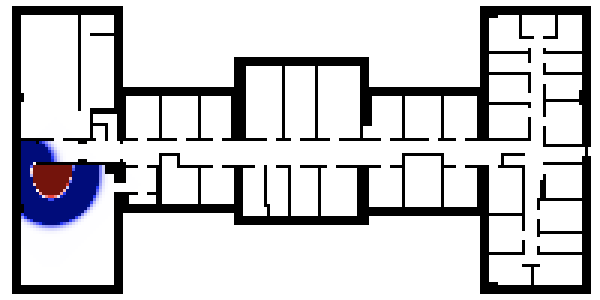


Plot_2.png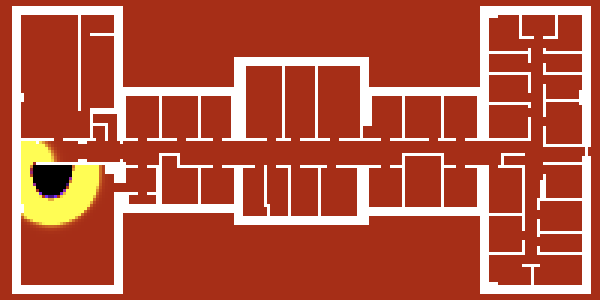

In [262]:
Pn_minus_1 = np.zeros((20000,1))
Pn = np.zeros((20000,1))

time_iters = 400
p_0 = 10
w = 100*np.pi

for interval in range(time_iters):
    
    time_now = interval*dt # Update time for sin function
    Pn = P_vec_with_sin(Pn, p_0, w, time_now) # Update P_n vector with speaker sin wave
    
    P_nplusone = np.dot(A, Pn) - Pn_minus_1 # Produce new P at n+1
    Pn_minus_1 = Pn # set values for next iteration
    Pn = P_nplusone
    
    if time_now >= 0.105:
        break
        

In [263]:
P_nplusone_for_plotting = np.reshape(P_nplusone, (100,200))
plot1("./Plot_3.png", P_nplusone_for_plotting, pierce, -1.1, 1.1, 3)
plot2("./Plot_4.png", P_nplusone_for_plotting, pierce, -1.1, 1.1, 3)

Our plots of the pressure field in the building at t = 0.105s are:

Plot_3.png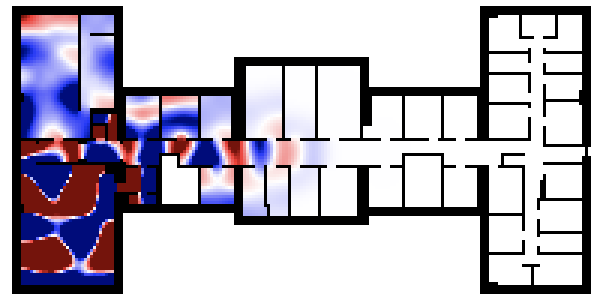

Plot_4.png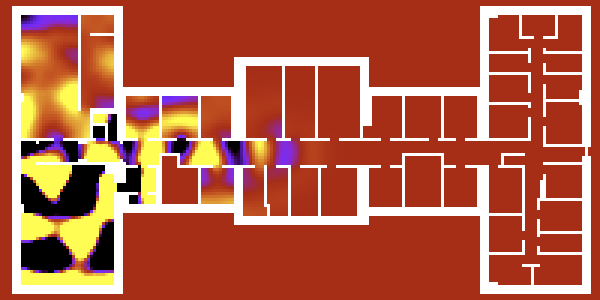

In [265]:
Pn_minus_1 = np.zeros((20000,1))
Pn = np.zeros((20000,1))

time_iters = 1000
p_0 = 10
w = 100*np.pi

for interval in range(time_iters):
    
    time_now = interval*dt # Update time for sin function
    Pn = P_vec_with_sin(Pn, p_0, w, time_now) # Update P_n vector with speaker sin wave
    
    P_nplusone = np.dot(A, Pn) - Pn_minus_1 # Produce new P at n+1
    Pn_minus_1 = Pn # set values for next iteration
    Pn = P_nplusone
    
    if time_now >= 0.505:
        break

print(time_now)

0.5052507288629737


In [266]:
P_nplusone_for_plotting = np.reshape(P_nplusone, (100,200))
plot1("./Plot_5.png", P_nplusone_for_plotting, pierce, -1.1, 1.1, 3)
plot2("./Plot_6.png", P_nplusone_for_plotting, pierce, -1.1, 1.1, 3)

Our plots of the pressure field in the building at t = 0.505s are:

Plot_5.png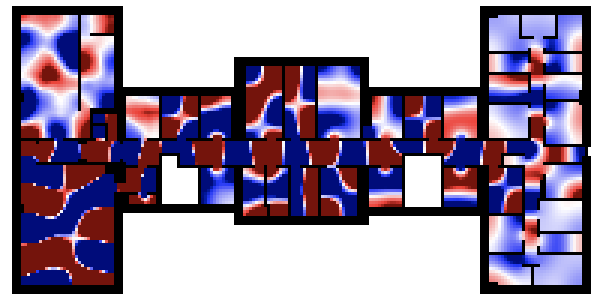

Plot_6.png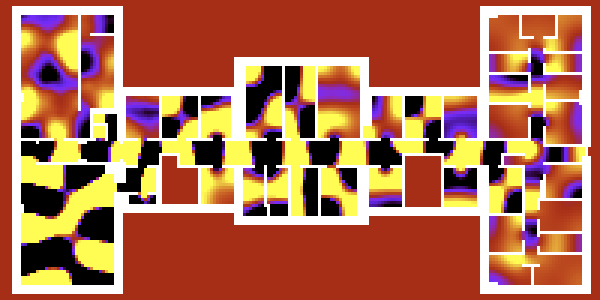

In [267]:
Pn_minus_1 = np.zeros((20000,1))
Pn = np.zeros((20000,1))

time_iters = 2000
p_0 = 10
w = 100*np.pi

for interval in range(time_iters):
    
    time_now = interval*dt # Update time for sin function
    Pn = P_vec_with_sin(Pn, p_0, w, time_now) # Update P_n vector with speaker sin wave
    
    P_nplusone = np.dot(A, Pn) - Pn_minus_1 # Produce new P at n+1
    Pn_minus_1 = Pn # set values for next iteration
    Pn = P_nplusone
    
    if time_now >= 1.005:
        break
        
print(time_now)

1.0051661807580174


In [268]:
P_nplusone_for_plotting = np.reshape(P_nplusone, (100,200))
plot1("./Plot_7.png", P_nplusone_for_plotting, pierce, -1.1, 1.1, 3)
plot2("./Plot_8.png", P_nplusone_for_plotting, pierce, -1.1, 1.1, 3)

Our plots of the pressure field in the building at t = 1.005s are:

Plot_7.png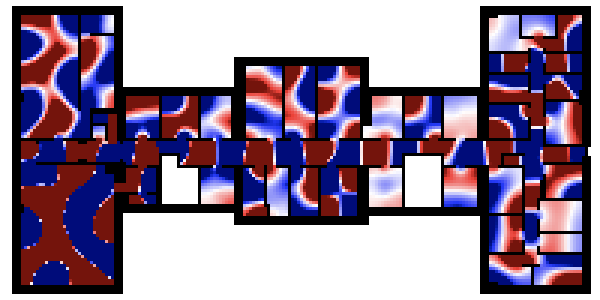

Plot_8.png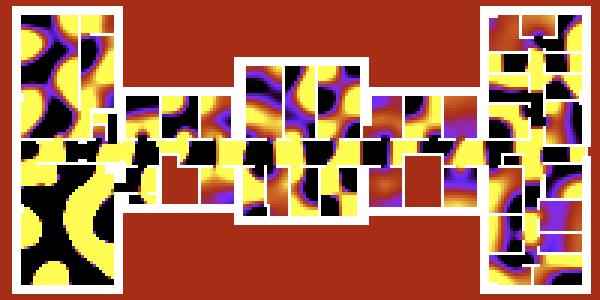

## 2c)

Use similar code as before, but set the new terminating condition. 

In [269]:
Pn_minus_1 = np.zeros((20000,1))
Pn = np.zeros((20000,1))

time_iters = 1000
p_0 = 10
w = 100*np.pi

person1_p_list = []

for interval in range(time_iters):
    
    time_now = interval*dt # Update time for sin function
    Pn = P_vec_with_sin(Pn, p_0, w, time_now) # Update P_n vector with speaker sin wave
    
    P_nplusone = np.dot(A, Pn) - Pn_minus_1 # Produce new P at n+1
    Pn_minus_1 = Pn # set values for next iteration
    Pn = P_nplusone
    
    P_reshaped = np.reshape(P_nplusone, (100,200))
    P_abs_val = abs(P_reshaped[35, 73])
    
    person1_p_list.append(P_abs_val)
    
    if P_abs_val > 10**(-3):
        break



In [270]:
print("Statements to check termination condition:")
print(P_abs_val)
print(person1_p_list[-1])
print(person1_p_list[-2])
print("\n", "Time when person first hears the sound:")
print(time_now)

Statements to check termination condition:
0.00142746642970674
0.00142746642970674
0.0009096378034446683

 Time when person first hears the sound:
0.07309329446064139


So Person C first hears the sound at 0.073 seconds.

In [271]:
Pn_minus_1 = np.zeros((20000,1))
Pn = np.zeros((20000,1))

time_iters = 1000
p_0 = 10
w = 100*np.pi

person2_p_list = []

for interval in range(time_iters):
    
    time_now = interval*dt # Update time for sin function
    Pn = P_vec_with_sin(Pn, p_0, w, time_now) # Update P_n vector with speaker sin wave
    
    P_nplusone = np.dot(A, Pn) - Pn_minus_1 # Produce new P at n+1
    Pn_minus_1 = Pn # set values for next iteration
    Pn = P_nplusone
    
    P_reshaped = np.reshape(P_nplusone, (100,200))
    P_abs_val = abs(P_reshaped[61, 109])
    
    person2_p_list.append(P_abs_val)
    
    if P_abs_val > 10**(-3):
        break

In [272]:
print("Statements to check termination condition:")
print(P_abs_val)
print(person2_p_list[-1])
print(person2_p_list[-2])
print("\n", "Time when person first hears the sound:")
print(time_now)

Statements to check termination condition:
0.001262251537415511
0.001262251537415511
0.0008633498112028842

 Time when person first hears the sound:
0.10830612244897958


So Person G first hears the sound at 0.108 seconds.

In [273]:
Pn_minus_1 = np.zeros((20000,1))
Pn = np.zeros((20000,1))

time_iters = 1000
p_0 = 10
w = 100*np.pi

time_list = []
person3_p_list = []

for interval in range(time_iters):
    
    time_now = interval*dt # Update time for sin function
    Pn = P_vec_with_sin(Pn, p_0, w, time_now) # Update P_n vector with speaker sin wave
    
    P_nplusone = np.dot(A, Pn) - Pn_minus_1 # Produce new P at n+1
    Pn_minus_1 = Pn # set values for next iteration
    Pn = P_nplusone
    
    P_reshaped = np.reshape(P_nplusone, (100,200))
    P_abs_val = abs(P_reshaped[91, 188])
    
    person3_p_list.append(P_abs_val)
    
    time_list.append(time_now)
    
    if P_abs_val > 10**(-3):
        break

In [274]:
print("Statements to check termination condition:")
print(P_abs_val)
print(person3_p_list[-1])
print(person3_p_list[-2])
print("\n", "Time when person first hears the sound:")
print(time_now)

Statements to check termination condition:
0.0010012132239861087
0.0010012132239861087
0.0009889676987950844

 Time when person first hears the sound:
0.23048396501457724


So Person M first hears the sound at 0.230 seconds.

These resutls are reasonable. The order in which they hear the sound corresponds to the order of their closeness to the speaker (e.g., Person C is closest to the speaker and hears the sound first). The plots above show this visually -- the wave propogates outward from the speaker as time progresses, and it reaches Person C before it reaches Person G before it reaches Person M. 

## 2d)

In [276]:
Pn_minus_1 = np.zeros((20000,1))
Pn = np.zeros((20000,1))

time_iters = 2000
p_0 = 10
w = 100*np.pi

personC_p_abs_val_list = []
personC_p_list = []
time_list = []

for interval in range(time_iters):
    
    time_now = interval*dt # Update time for sin function
    Pn = P_vec_with_sin(Pn, p_0, w, time_now) # Update P_n vector with speaker sin wave
    
    P_nplusone = np.dot(A, Pn) - Pn_minus_1 # Produce new P at n+1
    Pn_minus_1 = Pn # set values for next iteration
    Pn = P_nplusone
    
    P_reshaped = np.reshape(P_nplusone, (100,200))
    P_abs_val = abs(P_reshaped[35, 73])
    P_val = P_reshaped[35,73]
    
    personC_p_abs_val_list.append(P_abs_val)
    personC_p_list.append(P_val)
    time_list.append(time_now)
    
    if time_now >= 1.000:
        break
print(time_now)

1.0003644314868803


In [277]:
Pn_minus_1 = np.zeros((20000,1))
Pn = np.zeros((20000,1))

time_iters = 2000
p_0 = 10
w = 100*np.pi

personG_p_abs_val_list = []
personG_p_list = []
time_list = []

for interval in range(time_iters):
    
    time_now = interval*dt # Update time for sin function
    Pn = P_vec_with_sin(Pn, p_0, w, time_now) # Update P_n vector with speaker sin wave
    
    P_nplusone = np.dot(A, Pn) - Pn_minus_1 # Produce new P at n+1
    Pn_minus_1 = Pn # set values for next iteration
    Pn = P_nplusone
    
    P_reshaped = np.reshape(P_nplusone, (100,200))
    P_abs_val = abs(P_reshaped[61, 109])
    P_val = P_reshaped[61,109]
    
    personG_p_abs_val_list.append(P_abs_val)
    personG_p_list.append(P_val)
    time_list.append(time_now)
    
    if time_now >= 1.000:
        break
print(time_now)

1.0003644314868803


In [278]:
Pn_minus_1 = np.zeros((20000,1))
Pn = np.zeros((20000,1))

time_iters = 2000
p_0 = 10
w = 100*np.pi

personM_p_abs_val_list = []
personM_p_list = []
time_list = []

for interval in range(time_iters):
    
    time_now = interval*dt # Update time for sin function
    Pn = P_vec_with_sin(Pn, p_0, w, time_now) # Update P_n vector with speaker sin wave
    
    P_nplusone = np.dot(A, Pn) - Pn_minus_1 # Produce new P at n+1
    Pn_minus_1 = Pn # set values for next iteration
    Pn = P_nplusone
    
    P_reshaped = np.reshape(P_nplusone, (100,200))
    P_abs_val = abs(P_reshaped[91, 188])
    P_val = P_reshaped[91,188]
    
    personM_p_abs_val_list.append(P_abs_val)
    personM_p_list.append(P_val)
    time_list.append(time_now)
    
    if time_now >= 1.000:
        break
print(time_now)

1.0003644314868803


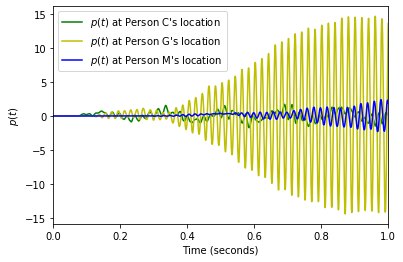

In [462]:
import matplotlib.pyplot as plt

plt.plot(time_list, personC_p_list, label="$p(t)$ at Person C's location", color='g')
plt.plot(time_list, personG_p_list, label="$p(t)$ at Person G's location", color='y')
plt.plot(time_list, personM_p_list, label="$p(t)$ at Person M's location", color='b')
x1, x2, y1, y2 = plt.axis()
plt.axis((0,1,y1,y2))
plt.xlabel("Time (seconds)")
plt.ylabel("$p(t)$")
plt.legend()
plt.show()

We can see that Person G is most likely to be disturbed by the speaker. At first, this is surprising, since Person C is closer to the speaker. But due to the way the floor plan interacts with the sound wave, the sound is lounder in Person G's office; we can see this in the plots above (the color is more intense in Person G's office than Person C's). So this conclusion aligns with our plots above. The fact that even Person M ends up hearing more than Person C indicates that the sound waves interfere destructively in Person C's office more than at the locations of Person G and Person M (or else, the waves interfere constructively at the G and M locations in comparison to their interference at C).   

# Problem 3

## 3a)

To derive the Jacobian, let's first write out the $F(U)$ vector:

\begin{equation*}
    F(U) =
    \begin{bmatrix}
    \frac{U_2 - 2U_1}{h^2} - e^{U_1} \\
    \frac{U_3 - 2U_2 + U_1}{h^2} - e^{U_2} \\
    \frac{U_4 - 2U_3 + U_2}{h^2} - e^{U_3} \\
    \frac{U_5 - 2U_4 + U_3}{h^2} - e^{U_4} \\
    \vdots \\
    \frac{-2U_{n-2} + U_{n-3}}{h^2} - e^{U_{n-2}} \\
    \end{bmatrix}
\end{equation*}


We can therefore see the form of the Jacobian $J_F$ will be:

\begin{equation*}
    J_F =
    \begin{bmatrix}
    \frac{\delta F_1(U)}{\delta U_1} & \frac{\delta F_1(U)}{\delta U_2} & 0 & 0 & 0 & 0 & \ldots & 0 \\
    \frac{\delta F_i(U)}{\delta U_{i-1}} & \frac{\delta F_i(U)}{\delta U_i} & \frac{\delta F_i(U)}{\delta U_{i+1}} & 0 & 0 & 0 & \ldots & 0 \\
    0 & \ddots & \ddots & \ddots & 0 & 0 & \ldots & 0 \\
    0 & 0 & \ddots & \ddots & \ddots & 0 & \ldots & 0 \\
    0 & \ldots & \ldots & \ddots & \ddots & \ddots & \ldots & 0 \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
    0 & 0 & \ldots & \ldots & \ldots & \ldots & \frac{\delta F_{n-2}(U)}{\delta U_{n-3}} & \frac{\delta F_{n-2}(U)}{\delta U_{n-2}} \\
    \end{bmatrix}
\end{equation*}


This gives us the derivatives we need to find, which are:

(For the first row)

$\frac{\delta F_1(U)}{\delta U_1} = \frac{-2}{h^2} - e^{U_1}$

$\frac{\delta F_1(U)}{\delta U_2} = \frac{1}{h^2}$

(For the middle rows)

$\frac{\delta F_i(U)}{\delta U_{i-1}} = \frac{1}{h^2}$

$\frac{\delta F_i(U)}{\delta U_i} = \frac{-2}{h^2} - e^{U_i}$

$\frac{\delta F_i(U)}{\delta U_{i+1}} = \frac{1}{h^2}$

(For the final row)

$\frac{\delta F_{n-2}(U)}{\delta U_{n-3}} = \frac{1}{h^2}$

$\frac{\delta F_{n-2}(U)}{\delta U_{n-2}} = \frac{-2}{h^2} - e^{U_{n-2}}$




So now we can write the complete Jacobian by substituting the above:

\begin{equation*}
    J_F =
    \begin{bmatrix}
    \frac{-2}{h^2} - e^{U_1} & \frac{1}{h^2} & 0 & 0 & 0 & 0 & \ldots & 0 \\
    \frac{1}{h^2} & \frac{-2}{h^2} - e^{U_i} & \frac{1}{h^2} & 0 & 0 & 0 & \ldots & 0 \\
    0 & \frac{1}{h^2} & \frac{-2}{h^2} - e^{U_i} & \frac{1}{h^2} & 0 & 0 & \ldots & 0 \\
    0 & 0 & \ddots & \ddots & \ddots & 0 & \ldots & 0 \\
    0 & \ldots & \ldots & \ddots & \ddots & \ddots & \ldots & 0 \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
    0 & 0 & \ldots & \ldots & \ldots & \ldots & \frac{1}{h^2} & \frac{-2}{h^2} - e^{U_{n-2}} \\
    \end{bmatrix}
\end{equation*}

In the case $n = 101$:

\begin{equation*}
    J_F =
    \begin{bmatrix}
    \frac{-2}{h^2} - e^{U_1} & \frac{1}{h^2} & 0 & 0 & 0 & 0 & \ldots & 0 \\
    \frac{1}{h^2} & \frac{-2}{h^2} - e^{U_2} & \frac{1}{h^2} & 0 & 0 & 0 & \ldots & 0 \\
    0 & \frac{1}{h^2} & \frac{-2}{h^2} - e^{U_3} & \frac{1}{h^2} & 0 & 0 & \ldots & 0 \\
    0 & 0 & \ddots & \ddots & \ddots & 0 & \ldots & 0 \\
    0 & \ldots & \ldots & \ddots & \ddots & \ddots & \ldots & 0 \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
    0 & 0 & 0 & \ldots & 0 & \frac{1}{h^2} & \frac{-2}{h^2} - e^{U_{98}} & \frac{1}{h^2} \\
    0 & 0 & \ldots & \ldots & \ldots & \ldots & \frac{1}{h^2} & \frac{-2}{h^2} - e^{U_{99}} \\
    \end{bmatrix}
\end{equation*}


So the sparsity pattern of $J_F$ is a square matrix with $ n-2 = 99$ rows and columns, with zeros everywhere except for 3 spots in each row: the value that represents the matrix diagonal for that row, as well as the value immediately to the left and right of that diagonal value. If you step back, it looks like a 0 matrix with three adjacent diagonal lines running from the top left to the bottom right. 

## 3b)

In [458]:
n = 101
h = 2/(n-1)

def Jacobian(U_vector):
    
    J = np.zeros((99, 99))
    np.fill_diagonal(J, (-2/(h**2) - np.exp(U_vector)))
    np.fill_diagonal(J[1:], 1/(h**2))
    np.fill_diagonal(J[:,1:], 1/(h**2))
    
    return J
    
def f(U):
    f = []
    f.append((U[1] - 2*U[0])/h**2 - np.exp(U[0])) # first elem
    for i in range(1,U.shape[0]-1): # middle elems
        f.append((1/h**2)*(U[i+1] - 2*U[i] + U[i-1]) - np.exp(U[i]))
        
    f.append((1/h**2)*(-2*U[-1] + U[-2]) - np.exp(U[-1])) # last elem
    return np.array(f)

In [459]:
U = np.zeros((n-2, 1))

def newtons_vec_method(U, n):

    while 1 == 1:

        F = f(U)
        J = Jacobian(U)
               
        delta_U = np.linalg.solve(J, F)
        Unew = U - delta_U

        delta_U_norm = np.linalg.norm(delta_U)
        U_norm = np.linalg.norm(U)
        
        if U_norm != 0:
            if delta_U_norm/U_norm < 10**(-10):
                return U
        U = Unew

    return U


In [460]:
U_array = newtons_vec_method(U, n)

U_list = list(U_array)
ODE_soln = [0.0] + U_list + [0.0]

Approximation of u(0) is [-0.36804822]


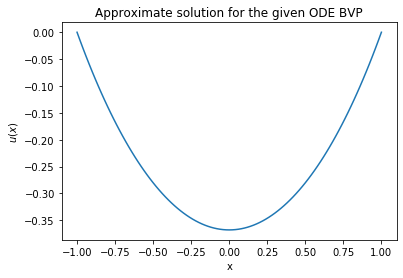

In [461]:
x_vals = []
for i in range(n):
    x_vals.append(-1 + i*h)

#Find index value where x = 0, to find u(0)
index = list(x_vals).index(0)

#Grab u(0), the solutiion value at index i
print("Approximation of u(0) is", ODE_soln[index])

plt.plot(x_vals, ODE_soln)
plt.title("Approximate solution for the given ODE BVP")
plt.xlabel("x")
plt.ylabel("$u(x)$")
plt.show()

So our approximation for $u(0)$ is -0.36804822



For this problem set I spoke with Kaela Nelson and Matthieu Meeus.